#### Chris Buie challenge05

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

Data:

Exercises 1-10: congressional votes Congressional Voting Records Dataset

Exercise 11: movie data

Exercise 12: breast cancer surgery Haberman Survival Dataset


##### Attribute Information:

1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
%matplotlib inline
plt.style.context('ggplot')



#### Exercise 5.1

##### Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

##### Convert each ? to this probability (when yes=1 and no=0, this is the mean of the column).



In [253]:
# Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None, sep=",")
df.replace('?', np.NaN,inplace=True)
df.replace('y',np.int(1),inplace=True)
df.replace('n', np.int(0),inplace=True)
df.fillna(np.round(df.mean(),0),inplace=True)
df.head(8)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


#### Exercise 5.2

Split the data into a test and training set. Use this function:

In [254]:
X = df.iloc[:,1:]
y = df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)


#### Exercise 5.3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):
##### Try it with a lot of different k values (number of neighbors), from 1 to 20
Which k has the highest value?

k value of 8 has the highest Accuracy Score of 0.931297709924.


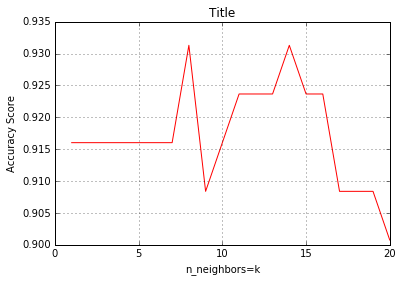

In [255]:
knn_score = []
k = range(1,20+1)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    fit = knn.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    knn_score.append(accuracy_score(y_test,y_pred))
plt.grid()
plt.plot(k,knn_score,'r')
plt.title('Title')
plt.ylabel('Accuracy Score')
plt.xlabel('n_neighbors=k');

print "k value of %s has the highest Accuracy Score of %s." % (knn_score.index(np.max(knn_score))+1, np.max(knn_score))

#### Exercise 5.4

Make a similar model but with LogisticRegression instead, calculate test accuracy.



In [256]:
LogReg = LogisticRegression()
LogReg_fit = LogReg.fit(X_train,y_train)
y_pred = LogReg_fit.predict(X_test)
LogReg_score = accuracy_score(y_test,y_pred)
print 'Logistic Regression has a Accuracy Score of %s on the same test/train split ' %LogReg_score

Logistic Regression has a Accuracy Score of 0.93893129771 on the same test/train split 


#### Exercise 5.5

Make a bar graph of democrats and republicans. How many of each are there?


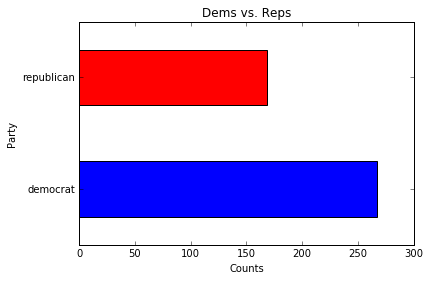

In [257]:
df[0].value_counts().plot(kind='barh', title='Dems vs. Reps', color=['b','r'])
plt.xlabel('Counts');
plt.ylabel('Party');

#### Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.



In [258]:
def dem(x):
    democrat = []
    for i in range(len(x)):
        democrat.append('democrat')
    return democrat

def rep(x):
    republican = []
    for i in range(len(x)):
        republican.append('republican')
    return republican

y_pred = dem(X_test)
dem_score = accuracy_score(y_test,y_pred)

y_pred = rep(X_test)
rep_score = accuracy_score(y_test,y_pred)

print 'Democrat Score :', dem_score
print 'Republican Score :', rep_score



Democrat Score : 0.587786259542
Republican Score : 0.412213740458


#### Exercise 5.6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



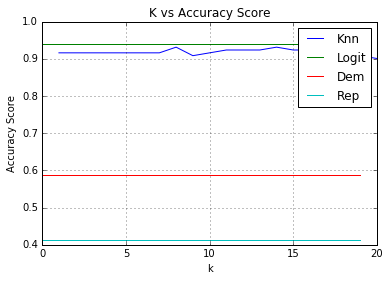

In [259]:
x = range(1,20+1)

plt.plot(x,knn_score)
plt.plot(np.repeat(LogReg_score, len(x)))
plt.plot(np.repeat(dem_score, len(x)))
plt.plot(np.repeat(rep_score, len(x)))
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('K vs Accuracy Score')
plt.legend(['Knn','Logit','Dem','Rep']);


#### Exercise 5.7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

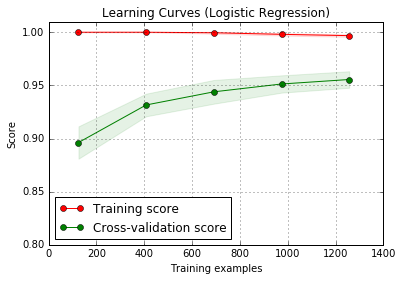

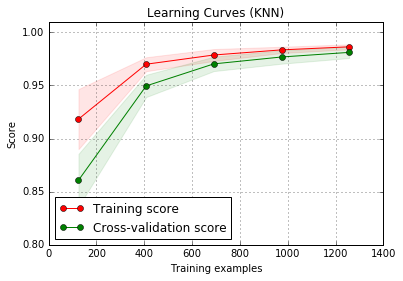

In [260]:
#from scikit learn: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Logistic Regression)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=4444)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4)
plt.show()

title = "Learning Curves (KNN)"
estimator = KNeighborsClassifier(n_neighbors=8)
plot_learning_curve(estimator, title, X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Exercise 5.8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

In [261]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
names = 'GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()'
names = names.split(",")

for i in range(len(models)):
    model = models[i]
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    score = accuracy_score(y_test,y_pred); 
    print names[i],' :',score

GaussianNB()  : 0.93893129771
SVC()  : 0.954198473282
DecisionTreeClassifier()  : 0.923664122137
RandomForestClassifier()  : 0.923664122137


#### Exercise 5.9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself. Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns
Use this function to calculate the cross validation score of each of the classifiers you tried before.




In [262]:
from sklearn.model_selection import cross_val_score

for i in range(len(models)):
    print('%s  cross_val_score :  %s' %(names[i],np.mean(cross_val_score(models[i], X, y, cv=10))))
    

GaussianNB()  cross_val_score :  0.810353758357
SVC()  cross_val_score :  0.487051912078
DecisionTreeClassifier()  cross_val_score :  0.829215169743
RandomForestClassifier()  cross_val_score :  0.908694350231


#### Exercise 5.10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

#### Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [263]:
# Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None, sep=",")
df2.replace('?', np.NaN,inplace=True)
df2.replace('y',np.int(1),inplace=True)
df2.replace('n', np.int(0),inplace=True)
df2.fillna(np.round(df.mean(),0),inplace=True)
df2.head(3)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [264]:
X2 = df2.iloc[:,2:]
y2 = df2.iloc[:,1]

models = [KNeighborsClassifier(),LogisticRegression()]
names = 'KNeighborsClassifier(),LogisticRegression()'
names = names.split(',')

for i in range(len(models)):
    print('%s  cross_val_score :  %s' %(names[i],np.mean(cross_val_score(models[i], X2, y2, cv=20))))
  

KNeighborsClassifier()  cross_val_score :  0.647590814982
LogisticRegression()  cross_val_score :  0.693247694335


#### Exercise 5.11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?



/Users/cbuie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


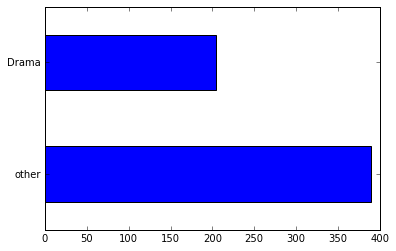

In [265]:
m_df = pd.read_csv('2016_numbers.csv')
m_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
m_df.Genre[m_df['Genre']!='Drama'] ='other'
m_df.Genre.value_counts().plot(kind='barh');

In [266]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 606
Data columns (total 8 columns):
Rank            593 non-null int64
Movie           593 non-null object
ReleaseDate     593 non-null object
Distributor     593 non-null object
Genre           593 non-null object
MPAA            593 non-null object
Gross           593 non-null int64
Tickets Sold    593 non-null int64
dtypes: int64(3), object(5)
memory usage: 41.7+ KB


In [267]:
X = m_df[['Tickets Sold','Gross']]
y = m_df['Genre']

baseline = m_df[m_df['Genre']=='Drama']

models = [KNeighborsClassifier(),LogisticRegression()]
names = 'KNeighborsClassifier(),LogisticRegression()'
names = names.split(',')

for i in range(len(models)):
    print('%s  cross_val_score :  %s' %(names[i],np.mean(cross_val_score(models[i], X2, y2, cv=20))))
  

KNeighborsClassifier()  cross_val_score :  0.647590814982
LogisticRegression()  cross_val_score :  0.693247694335


#### Baseline for Genre Drama

In [268]:
baseline = m_df[m_df['Genre']=='Drama']['Genre']
(len(baseline))*1.0/len(m_df['Genre'])

0.3440134907251265

In [269]:
LogReg = LogisticRegression()
LogReg_fit = LogReg.fit(X,y)
LogReg.coef_


array([[  3.61064850e-09,   3.04377948e-08]])

#### Exercise 5.12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.



In [270]:
cols = ['age','year','nodes','survival']
df = pd.DataFrame.from_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',index_col=None, header=None)
df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age         306 non-null int64
year        306 non-null int64
nodes       306 non-null int64
survival    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


#### What is the average and standard deviation of the age of all of the patients?

In [271]:
print 'Avg. Age : %s' % df.age.mean()
print 'Std. Age : %s' % df.age.std()

Avg. Age : 52.4575163399
Std. Age : 10.8034523493


#### What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [282]:
print 'Avg. for patients that survivied > 5 yrs: %s' %(df.age[df['survival'] == 1].mean())
print 'Std. for patients that survivied > 5 yrs: %s'  %(df.age[df['survival'] == 1].std())

Avg. for patients that survivied > 5 yrs: 52.0177777778
Std. for patients that survivied > 5 yrs: 11.0121541799


#### Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

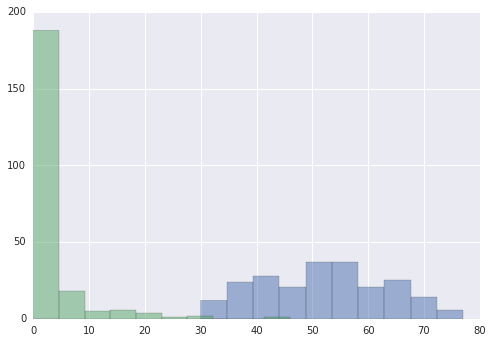

In [314]:
import seaborn as sns
plt.hist(df.age[df['survival'] == 1], alpha=.5);
plt.hist(df.nodes[df['survival'] == 1], alpha=.5);


(-2.3916081033868042, 5)

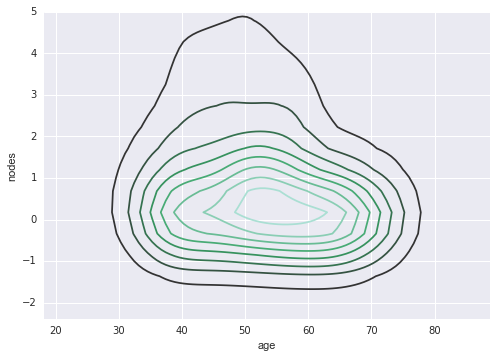

In [319]:
sns.kdeplot(df.age[df['survival'] == 1], df.nodes[df['survival'] == 1])
plt.ylim(ymax=5)

#### What is the earliest year of surgery in this dataset?

In [320]:
df.year.min()

58

#### What is the most recent year of surgery?

In [324]:
df['year'].max()

69

#### Use logistic regression to predict survival after 5 years. How well does your model do?

In [351]:
X = df.iloc[:,0:-1]
y = df['survival']

score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10))
print score

0.751659946237


#### What are the coefficients of logistic regression? Which features affect the outcome how?

In [352]:
model = LogisticRegression()
fit = model.fit(X,y)
for i in range(len(list(fit.coef_[0]))):
    beta = fit.coef_[0][i]
    print(X.columns[i],'beta:',fit.coef_[0][i])

('age', 'beta:', -0.018546889126013325)
('year', 'beta:', 0.034545797986659937)
('nodes', 'beta:', -0.088123140474524589)


#### Draw the learning curve for logistic regression in this case.

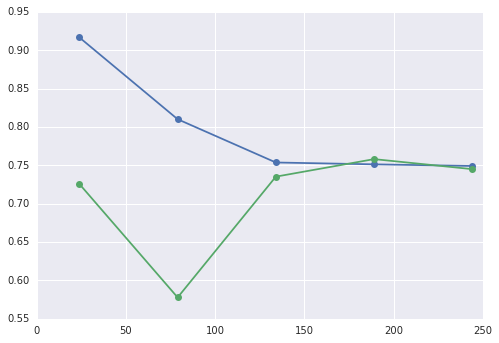

In [357]:
m, train_err, test_err = learning_curve(LogisticRegression(), X, y, cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err,'o-')
plt.plot(m,test_cv_err,'o-');

